In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

In [ ]:
autoencoder = Sequential([
    Dense(6, activation='relu', input_shape=(4,)),
    Dense(2, activation='relu'),
    Dense(4, activation='sigmoid')
])


In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=50, shuffle=True)
X_autoencoded = autoencoder.predict(X)
pca_mse = mean_squared_error(X, pca.inverse_transform(X_pca))
autoencoder_mse = mean_squared_error(X, X_autoencoded)
print("PCA MSE:", pca_mse)
print("Autoencoder MSE:", autoencoder_mse)

Epoch 1/50
5/5 [==============================] - 1s 4ms/step - loss: 13.0788
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 13.0416
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 13.0060
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 12.9715
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 12.9378
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 12.9055
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 12.8738
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 12.8440
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 12.8148
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 12.7876
Epoch 11/50
5/5 [==============================] - 0s 3ms/step - loss: 12.7606
Epoch 12/50
5/5 [==============================] - 0s 3ms/step - loss: 12.7355
Epoch 13/50
5/5 [==============================] - 0s 3ms/ste

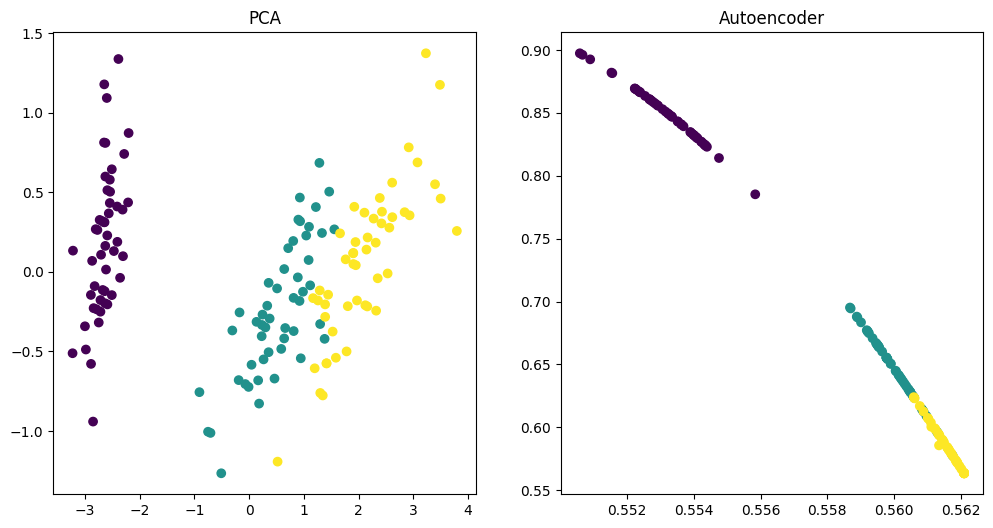

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.subplot(1, 2, 2)
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=y, cmap='viridis')
plt.title('Autoencoder')
plt.show()